In [4]:
%% Read original image and convert it to double
I    = imread('lena.bmp');
[dimx,dimy] = size(I);
Id   = double(I);

%subplot(111)
%imshow(I)

In [5]:
%% Generate random watermark
rand('state',123);
w = round(rand(1,1000));
save('watermark','w');

In [7]:
%% Define watermark strenght
alpha = 0.1;

%% Compute DCT
J = dct2(I);

%% Reshape the DCT into a vector
J_prime = reshape(J, 1, dimx*dimy);

%% Coefficient selection (hint: use sing, abs and sort functions)
J_sign = sign(J_prime);
J_mod = abs(J_prime);
[J_sorted, indexes_sorted] = sort(J_mod, 'descend');

In [8]:
%% Embedding

k = 2; % DC is in position 1
for j=1:1000
    index_to_watermark = indexes_sorted(k);
    J_mod(index_to_watermark) = J_mod(index_to_watermark) * (1+alpha*w(j));
    k = k+1;
end

In [9]:
%% Restore the sign and go back to matrix representation using reshape
a = J_mod .* J_sign;
J_restored = reshape(a, dimx, dimy);

%% Inverse DCT
I_wat = idct2(J_restored);

PSNR = +38.50 dB
WPSNR = +44.48 dB


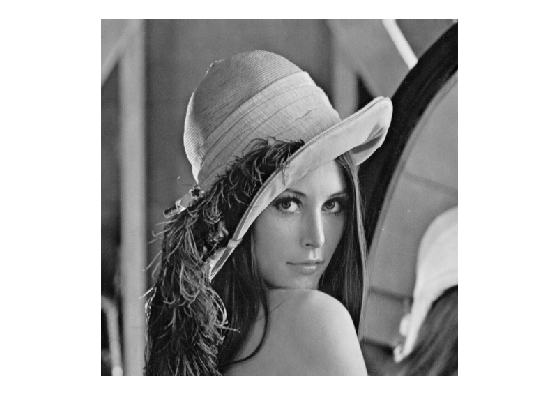

In [10]:
%% Show the watermarked image
imshow(I_wat,[]);
 
%% Save the watermarked image
imwrite(uint8(I_wat),'SSwat.bmp'); 

%% Calculate PSNR and WPSNR
q1 = PSNR(uint8(I), uint8(I_wat));
fprintf('PSNR = +%5.2f dB\n',q1);

q2 = WPSNR(uint8(I), uint8(I_wat));
fprintf('WPSNR = +%5.2f dB\n',q2);